## Pizza Hut Sentiment Analysis (Modelling)


### Capstone Project

#### Vernon Chun
#### 19 May 2023

Modelling will be performed using the cleaned **pizza_hut2.csv** dataset derived from the previous EDA proess. The modelling process will comprise of the following data science workflow steps:



1.   Apply SMOTE to balanced the unbalance "rating" target variable.
2.   Pre-process df['text'] using both Count & TF-IDF Vectorisers.
3.   Apply scaling to df[['cool','is_open','review_count', 'years_yelp','polarity']]
4. Train, test and evaluate each model.
5. Perform hyoerparameter tuning using RandomSearchCV.






In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv(r"/content/drive/MyDrive/IOD/Capstone/Yelp/pizza_hut2.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [ ]:
# Define the text and non-text columns
text_column = df.text
non_text_columns = df[['cool','is_open','review_count', 'years_yelp', 'polarity',]]

In [ ]:
df[['text', 'cool','is_open','review_count', 'years_yelp', 'polarity','rating']]

,text,cool,is_open,review_count,years_yelp,polarity,rating
0,terrible service called in an order for pick u...,0,0,1.0,12.0,-0.148942,1.0
1,so far ive been sitting here wanting to dine i...,0,1,7.0,8.0,0.050000,1.0
2,delivery issues caused our pizza to be over m...,0,1,3.0,8.0,0.400000,2.0
3,so i called and placed an order over the phone...,0,1,206.0,8.0,-0.085399,1.0
4,definitely should have read the reviews first ...,0,0,84.0,14.0,-0.278571,1.0
...,...,...,...,...,...,...,...
4775,if i could leave stars i would i ordered pi...,0,1,1.0,5.0,-0.238333,1.0
4776,i avoided reviewing this pizza hut location fo...,1,1,78.0,7.0,-0.073763,5.0
4777,the worst pizza hut ever so unprofessionali or...,0,0,1.0,7.0,-0.067735,1.0
4778,the food at this location is horrible its not ...,0,1,4.0,7.0,-0.133207,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4780 non-null   int64  
 1   name           4780 non-null   object 
 2   useful         4780 non-null   int64  
 3   funny          4780 non-null   int64  
 4   cool           4780 non-null   int64  
 5   text           4780 non-null   object 
 6   date           4780 non-null   object 
 7   year           4780 non-null   int64  
 8   city           4780 non-null   object 
 9   state          4780 non-null   object 
 10  latitude       4780 non-null   float64
 11  longitude      4780 non-null   float64
 12  is_open        4780 non-null   int64  
 13  categories     4780 non-null   object 
 14  user           4780 non-null   object 
 15  review_count   4780 non-null   float64
 16  years_yelp     4780 non-null   float64
 17  rating         4780 non-null   float64
 18  char_cou

In [ ]:
# Select only required columns for Modelling

df = df[['text','cool','is_open','review_count', 'years_yelp', 'polarity', 'rating', 'topic' ]]

In [ ]:
# Define the text and non-text columns
text_column = df.text
non_text_columns = df[['cool','is_open','review_count', 'years_yelp', 'polarity','topic']]

In [ ]:
# DEfine Test, Train, Split

X_train, X_test, y_train, y_test = train_test_split(df.drop("rating", axis=1), df["rating"], test_size=0.2, random_state=42, stratify=df["rating"])

## AA. Machine Learning Modelling - Base Models

### AA1. SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import MinMaxScaler, label_binarize
# from sklearn.metrics import classification_report, roc_curve, auc
# from sklearn.svm import SVC
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import make_pipeline as make_pipeline_imb
# import numpy as np
# import matplotlib.pyplot as plt

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with classifier for CountVectorizer
# pipeline_count = make_pipeline_imb(preprocessor_count, SMOTE(random_state=42), SVC(probability=True)) 

# # Combine preprocessor with classifier for TfidfVectorizer
# pipeline_tfidf = make_pipeline_imb(preprocessor_tfidf, SMOTE(random_state=42), SVC(probability=True)) 

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


## AA2. Logistics Regression

In [ ]:
# # Import LogisticRegression
# from sklearn.linear_model import LogisticRegression 


# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with classifier for CountVectorizer
# pipeline_count = make_pipeline_imb(preprocessor_count, SMOTE(random_state=42), LogisticRegression()) 

# # Combine preprocessor with classifier for TfidfVectorizer
# pipeline_tfidf = make_pipeline_imb(preprocessor_tfidf, SMOTE(random_state=42), LogisticRegression()) 

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('LR ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('LR ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


## AA3. Naive Bayes

In [ ]:
# # Import MultinomialNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.preprocessing import MinMaxScaler 

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with classifier for CountVectorizer
# pipeline_count = make_pipeline_imb(preprocessor_count, SMOTE(random_state=42), MultinomialNB()) 

# # Combine preprocessor with classifier for TfidfVectorizer
# pipeline_tfidf = make_pipeline_imb(preprocessor_tfidf, SMOTE(random_state=42), MultinomialNB()) 

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('NB ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('NB ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


### AB.Machine Learning Modelling - Hyperparameter Tuning

### AB1. SVM - RandomizedSearchCV



In [ ]:
# # SVM using RandomSearch CV

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, label_binarize
# from sklearn.metrics import classification_report, roc_curve, auc
# from sklearn.svm import SVC
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# import matplotlib.pyplot as plt

# # Define preprocessors
# preprocessor_count = ColumnTransformer(transformers=[('text', CountVectorizer(), 'text'), ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity', 'topic'])])
# preprocessor_tfidf = ColumnTransformer(transformers=[('text', TfidfVectorizer(), 'text'), ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity', 'topic'])])

# # Combine preprocessors with classifier
# pipeline_count = make_pipeline_imb(preprocessor_count, SMOTE(random_state=42), SVC(probability=True)) 
# pipeline_tfidf = make_pipeline_imb(preprocessor_tfidf, SMOTE(random_state=42), SVC(probability=True)) 

# # Define the hyperparameters
# param_distributions = {
#     'svc__C': np.logspace(-3, 2, 6),
#     'svc__kernel': ['rbf'],
#     'svc__gamma': ['scale', 'auto'],
#     'columntransformer__text__max_df': [0.5, 0.75, 1.0],
#     'columntransformer__text__min_df': [1, 2, 3]
# }

# # RandomizedSearchCV
# random_search_count = RandomizedSearchCV(pipeline_count, param_distributions, n_iter=5, cv=5, verbose=1, n_jobs=-1, random_state=42)
# random_search_tfidf = RandomizedSearchCV(pipeline_tfidf, param_distributions, n_iter=5, cv=5, verbose=1, n_jobs=-1, random_state=42)

# # Fit the models
# random_search_count.fit(X_train, y_train)
# random_search_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = random_search_count.best_estimator_.predict(X_test)
# y_pred_prob_count = random_search_count.best_estimator_.predict_proba(X_test)

# y_pred_tfidf = random_search_tfidf.best_estimator_.predict(X_test)
# y_pred_prob_tfidf = random_search_tfidf.best_estimator_.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

### AB2. Logistics Regression RandomizedSearchCV

In [ ]:
# # LR2 RandomizedSearchCV

# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import uniform
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as imPipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc
# import numpy as np
# import matplotlib.pyplot as plt

# X = df[['text','cool','is_open','review_count', 'years_yelp', 'rating', 'polarity']]
# y = df['rating']

# # split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["rating"])

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # SMOTE
# smote = SMOTE(random_state=42)

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = imPipeline(steps=[('preprocessor', preprocessor_count),
#                                    ('smote', smote),
#                                    ('classifier', LogisticRegression(solver='lbfgs', max_iter=2000))])

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = imPipeline(steps=[('preprocessor', preprocessor_tfidf),
#                                    ('smote', smote),
#                                    ('classifier', LogisticRegression(solver='lbfgs', max_iter=2000))])

# # Define parameter grid for CountVectorizer
# params_count = {
#     'preprocessor__text__max_features': [500, 1000, 2000],
#     'classifier__C': uniform(loc=0.01, scale=100)  # uniform distribution from 0.01 to 100.01
# }

# # Define parameter grid for TfidfVectorizer
# params_tfidf = {
#     'preprocessor__text__max_features': [500, 1000, 2000],
#     'classifier__C': uniform(loc=0.01, scale=100)  # uniform distribution from 0.01 to 100.01
# }

# # Combine pipeline with RandomizedSearchCV for CountVectorizer
# rand_search_count = RandomizedSearchCV(pipeline_count, params_count, cv=5, scoring='accuracy', n_iter=20)

# # Combine pipeline with RandomizedSearchCV for TfidfVectorizer
# rand_search_tfidf = RandomizedSearchCV(pipeline_tfidf, params_tfidf, cv=5, scoring='accuracy', n_iter=20)

# # Train the models
# rand_search_count.fit(X_train, y_train)
# rand_search_tfidf.fit(X_train, y_train)

# # Best parameters
# print("Best parameters for CountVectorizer:")
# print(rand_search_count.best_params_)

# print("Best parameters for TfidfVectorizer:")
# print(rand_search_tfidf.best_params_)

# # Make predictions
# y_pred_count = rand_search_count.predict(X_test)
# y_pred_tfidf = rand_search_tfidf.predict(X_test)

# # Compute predicted probabilities for CountVectorizer
# y_pred_prob_count = rand_search_count.predict_proba(X_test)

# # Compute predicted probabilities for TfidfVectorizer
# y_pred_prob_tfidf = rand_search_tfidf.predict_proba(X_test)


# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('GB01 ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('GB01 ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

### AB3. Naive Bayes RandomizedSearchCV

In [ ]:
# # NB2

# # Import necessary libraries
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.preprocessing import MinMaxScaler 
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', MinMaxScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with classifier for CountVectorizer
# pipeline_count = make_pipeline_imb(preprocessor_count, SMOTE(random_state=42), MultinomialNB()) 

# # Combine preprocessor with classifier for TfidfVectorizer
# pipeline_tfidf = make_pipeline_imb(preprocessor_tfidf, SMOTE(random_state=42), MultinomialNB()) 

# # Define parameters for RandomizedSearchCV
# params = {
#     'multinomialnb__alpha': np.linspace(0.5, 1.5, 6),
# }

# # Implement RandomizedSearchCV for CountVectorizer
# random_search_count = RandomizedSearchCV(pipeline_count, param_distributions=params, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
# random_search_count.fit(X_train, y_train)

# # Implement RandomizedSearchCV for TfidfVectorizer
# random_search_tfidf = RandomizedSearchCV(pipeline_tfidf, param_distributions=params, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
# random_search_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = rand_search_count.predict(X_test)
# y_pred_tfidf = rand_search_tfidf.predict(X_test)

# # Compute predicted probabilities for CountVectorizer
# y_pred_prob_count = rand_search_count.predict_proba(X_test)

# # Compute predicted probabilities for TfidfVectorizer
# y_pred_prob_tfidf = rand_search_tfidf.predict_proba(X_test)


# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Naive Bayes ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Naive Bayes ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

## BA. Ensemble Learning Modelling

### BA1. Random Forest

In [ ]:
# ## Random Forest

# from sklearn.ensemble import RandomForestClassifier
# from imblearn.pipeline import make_pipeline as make_imb_pipeline

# smote = SMOTE(random_state=42)

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = make_imb_pipeline(preprocessor_count, smote, RandomForestClassifier())

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = make_imb_pipeline(preprocessor_tfidf, smote, RandomForestClassifier())

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Random Forest ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

### BA2. Adaptive Boosting (AdaBoost)

In [ ]:
# # # AdaBoost

# from sklearn.ensemble import AdaBoostClassifier

# smote = SMOTE(random_state=42)

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = make_imb_pipeline(preprocessor_count, smote,AdaBoostClassifier())

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = make_imb_pipeline(preprocessor_tfidf, smote, AdaBoostClassifier())

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AdaBoost ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AdaBoost ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


### BA3.  Gradient Boosting

In [ ]:
# # GradientBoost Base Model

# from sklearn.ensemble import GradientBoostingClassifier

# smote = SMOTE(random_state=42)

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = make_imb_pipeline(preprocessor_count, smote,GradientBoostingClassifier())

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = make_imb_pipeline(preprocessor_tfidf, smote, GradientBoostingClassifier())

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Gradient Boosting ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Gradient Boosting ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

## BB.Ensemble Learning Modelling - Hyperparameter Tuning

### BB1 Random Forest - RandomizedSearchCV

In [ ]:
# ## RF using RandomSearch CV

# from sklearn.model_selection import RandomizedSearchCV

# # Define parameter space for both vectorizers
# vectorizer_params = {
#     'columntransformer__text__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'columntransformer__text__max_df': [0.5, 0.75, 1.0],
#     'columntransformer__text__min_df': [1, 2, 3],
#     'columntransformer__text__max_features': [None, 5000, 10000]
# }

# # Define parameter space for RandomForestClassifier
# classifier_params = {
#     'randomforestclassifier__n_estimators': [10, 50, 100, 200],
#     'randomforestclassifier__max_depth': [None, 10, 50, 100],
#     'randomforestclassifier__min_samples_split': [2, 5, 10],
#     'randomforestclassifier__min_samples_leaf': [1, 2, 4],
#     'randomforestclassifier__bootstrap': [True, False]
# }

# # Combine parameter spaces
# params = {**vectorizer_params, **classifier_params}

# # Apply RandomizedSearchCV to CountVectorizer pipeline
# random_search_count = RandomizedSearchCV(pipeline_count, param_distributions=params, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
# random_search_count.fit(X_train, y_train)

# # Apply RandomizedSearchCV to TfidfVectorizer pipeline
# random_search_tfidf = RandomizedSearchCV(pipeline_tfidf, param_distributions=params, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
# random_search_tfidf.fit(X_train, y_train)

# # Print best parameters for both pipelines
# print("Best parameters for CountVectorizer pipeline:")
# print(random_search_count.best_params_)
# print("Best parameters for TfidfVectorizer pipeline:")
# print(random_search_tfidf.best_params_)

# # Use best estimators to make predictions
# y_pred_count = random_search_count.best_estimator_.predict(X_test)
# y_pred_prob_count = random_search_count.best_estimator_.predict_proba(X_test)

# y_pred_tfidf = random_search_tfidf.best_estimator_.predict(X_test)
# y_pred_prob_tfidf = random_search_tfidf.best_estimator_.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()

### BB2 Adaptive Boosting (AdaBoost) - RandomizedSearchCV

In [ ]:
# # AdaBoost Base Model - RandomsearchCV

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from imblearn.pipeline import make_pipeline as make_imb_pipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import roc_curve, auc, classification_report
# from sklearn.preprocessing import label_binarize
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import make_pipeline as make_imb_pipeline
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# import matplotlib.pyplot as plt


# smote = SMOTE(random_state=42)

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # Define the parameter range for RandomizedSearch
# param_dist = {"n_estimators": range(50, 500),
#               "learning_rate": [0.01, 0.05, 0.1, 0.3, 1]}

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = make_imb_pipeline(preprocessor_count, smote, RandomizedSearchCV(AdaBoostClassifier(), param_distributions=param_dist))

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = make_imb_pipeline(preprocessor_tfidf, smote, RandomizedSearchCV(AdaBoostClassifier(), param_distributions=param_dist))

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Get the best estimator
# best_count = pipeline_count[-1].best_estimator_
# best_tfidf = pipeline_tfidf[-1].best_estimator_

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)


# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AB2 ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AB2 ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


### BB3 Gradient Boosting - RandomizedSearchCV

In [ ]:
# GB RandomizedSearchCV

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from imblearn.pipeline import make_pipeline as make_imb_pipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import roc_curve, auc, classification_report
# from sklearn.preprocessing import label_binarize
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# smote = SMOTE(random_state=42)

# # Define preprocessor for CountVectorizer
# preprocessor_count = ColumnTransformer(
#     transformers=[
#         ('text', CountVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp', 'polarity'])
#     ])

# # Define preprocessor for TfidfVectorizer
# preprocessor_tfidf = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'text'),
#         ('num', StandardScaler(), ['cool','is_open','review_count', 'years_yelp','polarity'])
#     ])

# # GradientBoosting parameters to tune
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_depth': [3, 4, 5]
# }

# # Create a base model
# gb = GradientBoostingClassifier(random_state=42)

# # Random search of parameters, using 3 fold cross validation
# gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Combine preprocessor with SMOTE and classifier for CountVectorizer
# pipeline_count = make_imb_pipeline(preprocessor_count, smote, gb_random)

# # Combine preprocessor with SMOTE and classifier for TfidfVectorizer
# pipeline_tfidf = make_imb_pipeline(preprocessor_tfidf, smote, gb_random)

# # Train the models
# pipeline_count.fit(X_train, y_train)
# pipeline_tfidf.fit(X_train, y_train)

# # Make predictions
# y_pred_count = pipeline_count.predict(X_test)
# y_pred_prob_count = pipeline_count.predict_proba(X_test)

# y_pred_tfidf = pipeline_tfidf.predict(X_test)
# y_pred_prob_tfidf = pipeline_tfidf.predict_proba(X_test)

# # Print classification reports
# print("Classification report for CountVectorizer:")
# print(classification_report(y_test, y_pred_count, zero_division=1))
# print("Classification report for TfidfVectorizer:")
# print(classification_report(y_test, y_pred_tfidf, zero_division=1))

# # Binarize the output
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# # Compute ROC curve and ROC area for each class
# fpr_count = dict()
# tpr_count = dict()
# roc_auc_count = dict()

# fpr_tfidf = dict()
# tpr_tfidf = dict()
# roc_auc_tfidf = dict()

# for i in range(n_classes):
#     fpr_count[i], tpr_count[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_count[:, i])
#     roc_auc_count[i] = auc(fpr_count[i], tpr_count[i])

#     fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_tfidf[:, i])
#     roc_auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])

# # Plot all ROC curves for CountVectorizer
# plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
# for i in range(n_classes):
#     plt.plot(fpr_count[i], tpr_count[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_count[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('GB01 ROC for CountVectorizer')
# plt.legend(loc="lower right")

# # Plot all ROC curves for TfidfVectorizer
# plt.subplot(1, 2, 2)
# for i in range(n_classes):
#     plt.plot(fpr_tfidf[i], tpr_tfidf[i],
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc_tfidf[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('GB01 ROC for TfidfVectorizer')
# plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


## CA. Deep Learning

### CA1.Recurrent Neural Networks (RNN)

In [ ]:
# # RNN 1

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import optimizers
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating

# # specify non-text features
# non_text_features = df[['cool','is_open','review_count', 'years_yelp', 'polarity','topic']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val, _, _ = train_test_split(tfidf_features, labels, test_size=0.2)
# count_features_train, count_features_val, _, _ = train_test_split(count_features, labels, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()


# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()


In [ ]:
# # RNN 2

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import optimizers
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating

# # specify non-text features
# non_text_features = df[['review_count', 'years_yelp', 'polarity']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val, _, _ = train_test_split(tfidf_features, labels, test_size=0.2)
# count_features_train, count_features_val, _, _ = train_test_split(count_features, labels, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()


# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

In [ ]:
# # RNN 3

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import optimizers
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating

# # specify non-text features
# non_text_features = df[['years_yelp']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val, _, _ = train_test_split(tfidf_features, labels, test_size=0.2)
# count_features_train, count_features_val, _, _ = train_test_split(count_features, labels, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()


# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

In [ ]:
# # RNN 4

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['review_count', 'years_yelp', 'polarity']]  # specify non-text features

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val, _, _ = train_test_split(tfidf_features, labels, test_size=0.2)
# count_features_train, count_features_val, _, _ = train_test_split(count_features, labels, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

### CA2. LSTM

Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 64s 450ms/step - loss: 1.1523 - accuracy: 0.6268 - val_loss: 0.8276 - val_accuracy: 0.6862
Epoch 2/5
120/120 [==============================] - 45s 373ms/step - loss: 0.3519 - accuracy: 0.8954 - val_loss: 0.9779 - val_accuracy: 0.6684
Epoch 3/5
120/120 [==============================] - 40s 332ms/step - loss: 0.0777 - accuracy: 0.9846 - val_loss: 1.2407 - val_accuracy: 0.6360
Epoch 4/5
120/120 [==============================] - 40s 333ms/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 1.2752 - val_accuracy: 0.6255
Epoch 5/5
120/120 [==============================] - 39s 325ms/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 1.4149 - val_accuracy: 0.6454
Epoch 1/5
120/120 [==============================] - 55s 416ms/step - loss: 0.8012 - accuracy: 0.7048 - val_loss: 0.8229 - val_accuracy: 0.7071
Epoch 2/5
120/120 [==============================] - 43s 360ms/step - loss: 0.3052 - accuracy: 0.9048 - val_loss: 0.9466 - val_accuracy:

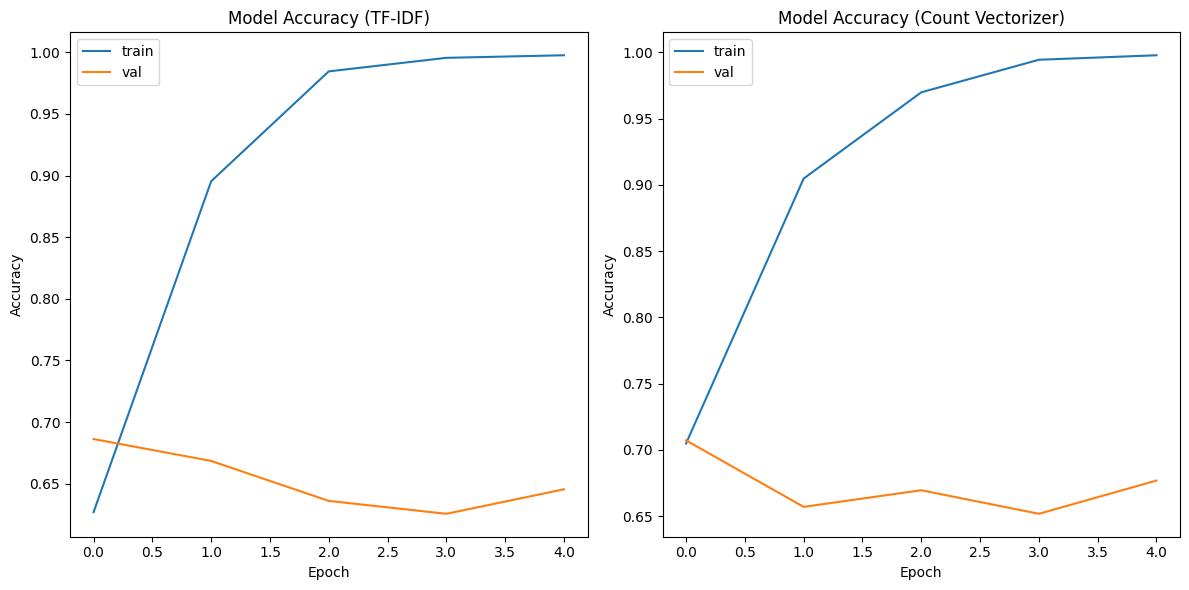

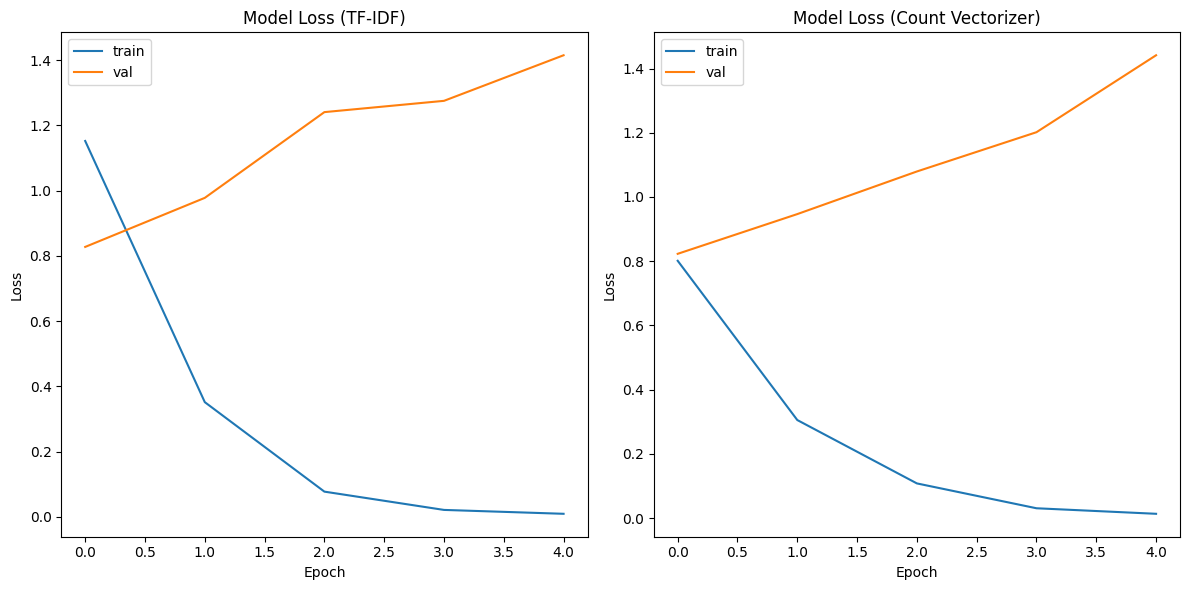

In [ ]:
# LSTM 1

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['cool','is_open','review_count', 'years_yelp', 'polarity','topic']]

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()


Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 55s 415ms/step - loss: 1.1976 - accuracy: 0.6017 - val_loss: 0.9135 - val_accuracy: 0.6768
Epoch 2/5
120/120 [==============================] - 43s 363ms/step - loss: 0.3664 - accuracy: 0.8941 - val_loss: 1.0433 - val_accuracy: 0.6726
Epoch 3/5
120/120 [==============================] - 40s 337ms/step - loss: 0.0743 - accuracy: 0.9838 - val_loss: 1.2469 - val_accuracy: 0.6224
Epoch 4/5
120/120 [==============================] - 39s 329ms/step - loss: 0.0224 - accuracy: 0.9971 - val_loss: 1.3211 - val_accuracy: 0.6527
Epoch 5/5
120/120 [==============================] - 39s 326ms/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 1.3995 - val_accuracy: 0.6454
Epoch 1/5
120/120 [==============================] - 55s 416ms/step - loss: 0.8230 - accuracy: 0.6896 - val_loss: 0.7991 - val_accuracy: 0.7071
Epoch 2/5
120/120 [==============================] - 44s 365ms/step - loss: 0.3025 - accuracy: 0.9082 - val_loss: 0.8973 - val_accuracy:

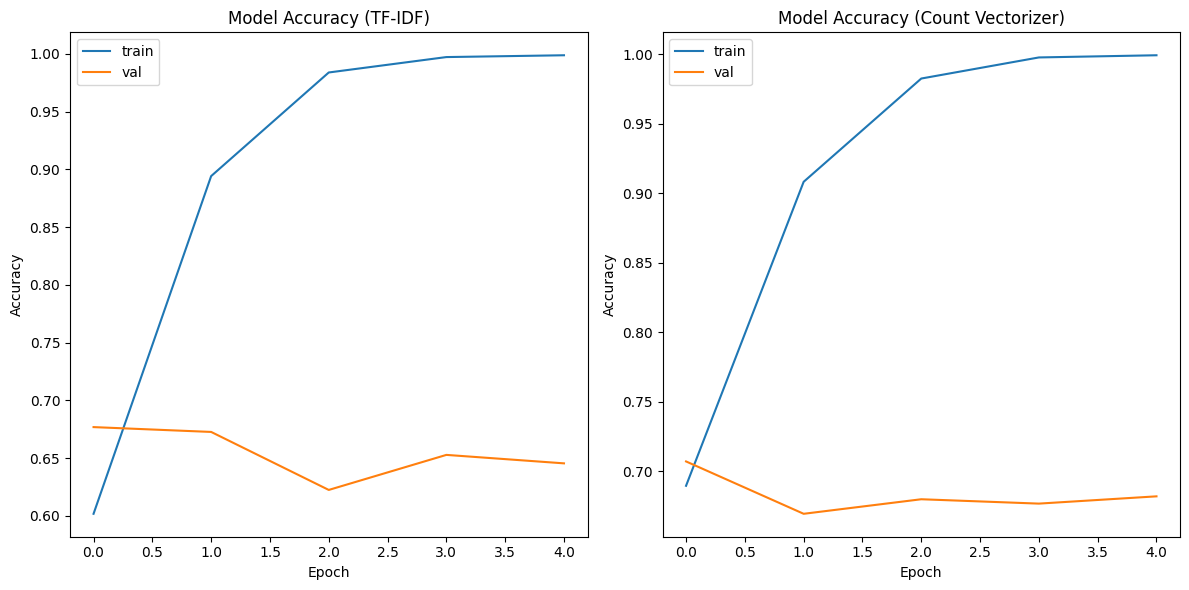

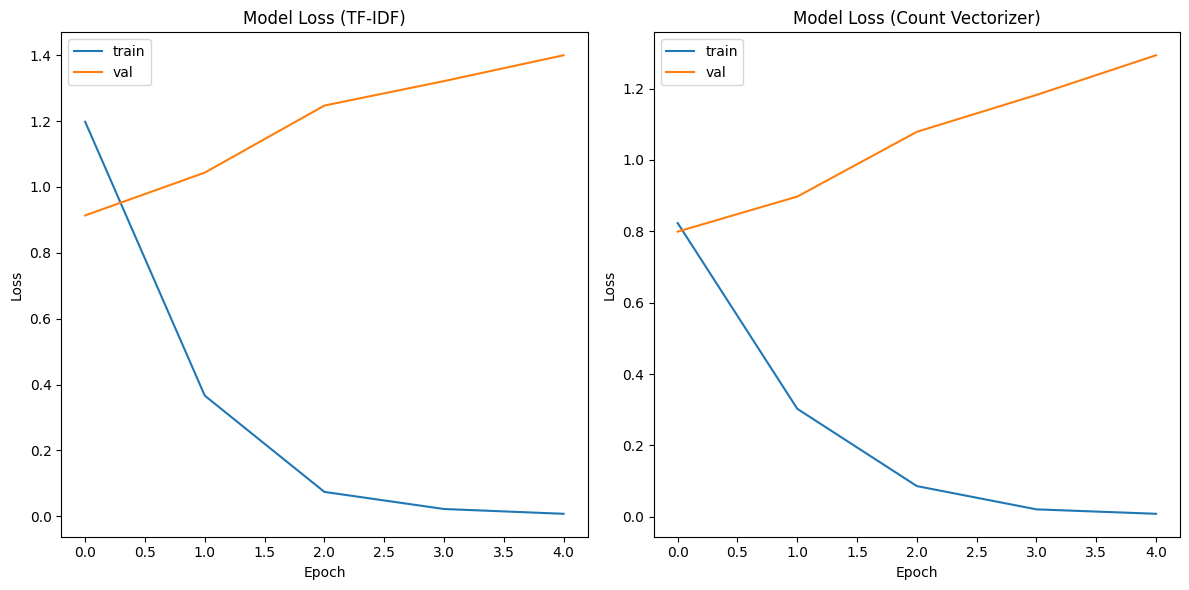

In [ ]:
# LSTM 2

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['review_count', 'years_yelp', 'polarity']]

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()


Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 56s 426ms/step - loss: 1.1661 - accuracy: 0.6206 - val_loss: 0.9601 - val_accuracy: 0.6632
Epoch 2/5
120/120 [==============================] - 44s 364ms/step - loss: 0.3414 - accuracy: 0.9001 - val_loss: 1.1008 - val_accuracy: 0.6579
Epoch 3/5
120/120 [==============================] - 41s 341ms/step - loss: 0.0774 - accuracy: 0.9835 - val_loss: 1.3282 - val_accuracy: 0.5994
Epoch 4/5
120/120 [==============================] - 39s 322ms/step - loss: 0.0175 - accuracy: 0.9969 - val_loss: 1.3529 - val_accuracy: 0.6391
Epoch 5/5
120/120 [==============================] - 38s 320ms/step - loss: 0.0045 - accuracy: 0.9997 - val_loss: 1.4326 - val_accuracy: 0.6632
Epoch 1/5
120/120 [==============================] - 54s 407ms/step - loss: 0.8543 - accuracy: 0.6906 - val_loss: 0.8998 - val_accuracy: 0.6872
Epoch 2/5
120/120 [==============================] - 43s 359ms/step - loss: 0.3188 - accuracy: 0.8998 - val_loss: 0.9953 - val_accuracy:

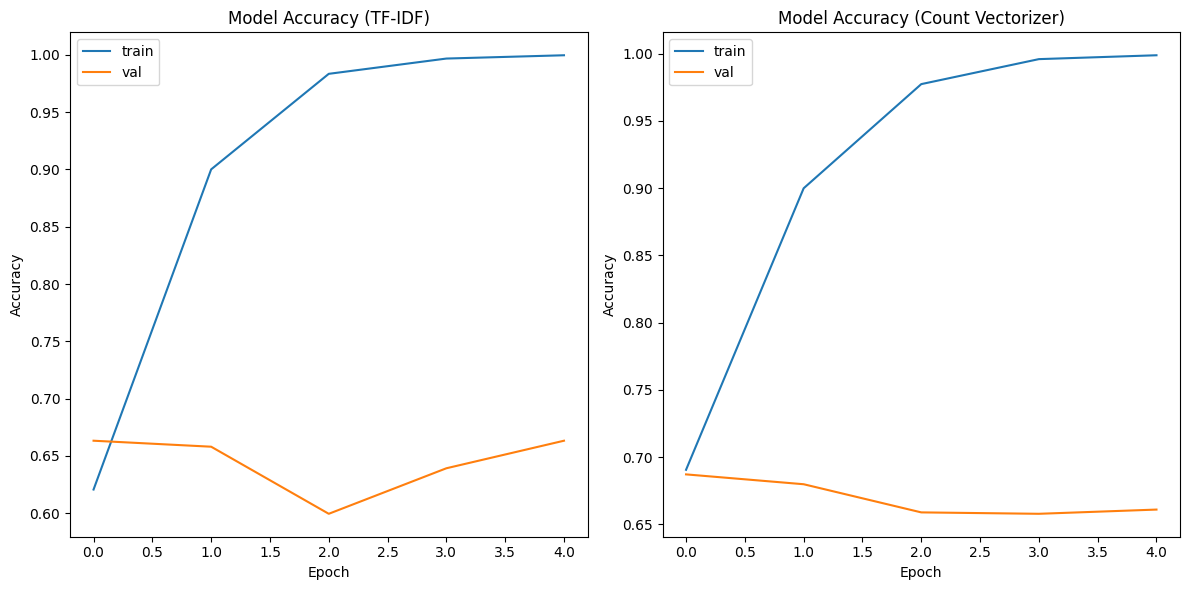

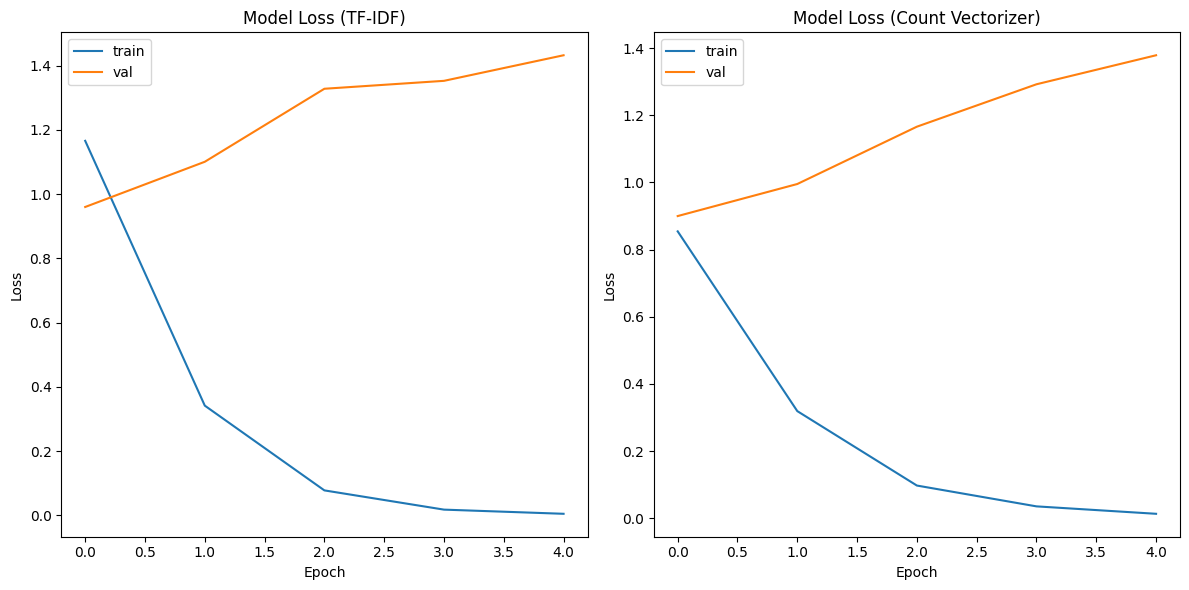

In [ ]:
# LSTM 3

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['years_yelp']]

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

### CA3. MLP

Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 57s 428ms/step - loss: 1.1396 - accuracy: 0.6266 - val_loss: 0.8206 - val_accuracy: 0.7082
Epoch 2/5
120/120 [==============================] - 43s 359ms/step - loss: 0.5291 - accuracy: 0.8020 - val_loss: 1.0524 - val_accuracy: 0.6475
Epoch 3/5
120/120 [==============================] - 41s 346ms/step - loss: 0.1355 - accuracy: 0.9644 - val_loss: 1.3422 - val_accuracy: 0.6370
Epoch 4/5
120/120 [==============================] - 39s 328ms/step - loss: 0.0213 - accuracy: 0.9963 - val_loss: 1.6674 - val_accuracy: 0.6151
Epoch 5/5
120/120 [==============================] - 40s 335ms/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 1.6586 - val_accuracy: 0.6224
Epoch 1/5
120/120 [==============================] - 58s 430ms/step - loss: 0.7690 - accuracy: 0.7040 - val_loss: 0.7989 - val_accuracy: 0.7050
Epoch 2/5
120/120 [==============================] - 42s 349ms/step - loss: 0.4423 - accuracy: 0.8413 - val_loss: 0.9543 - val_accuracy:

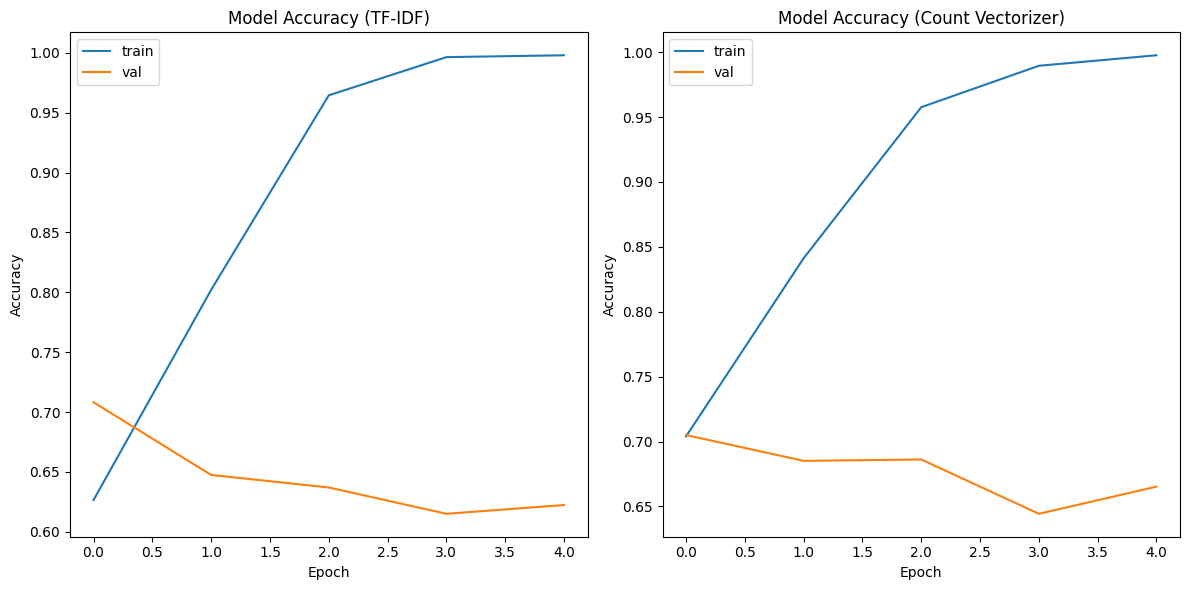

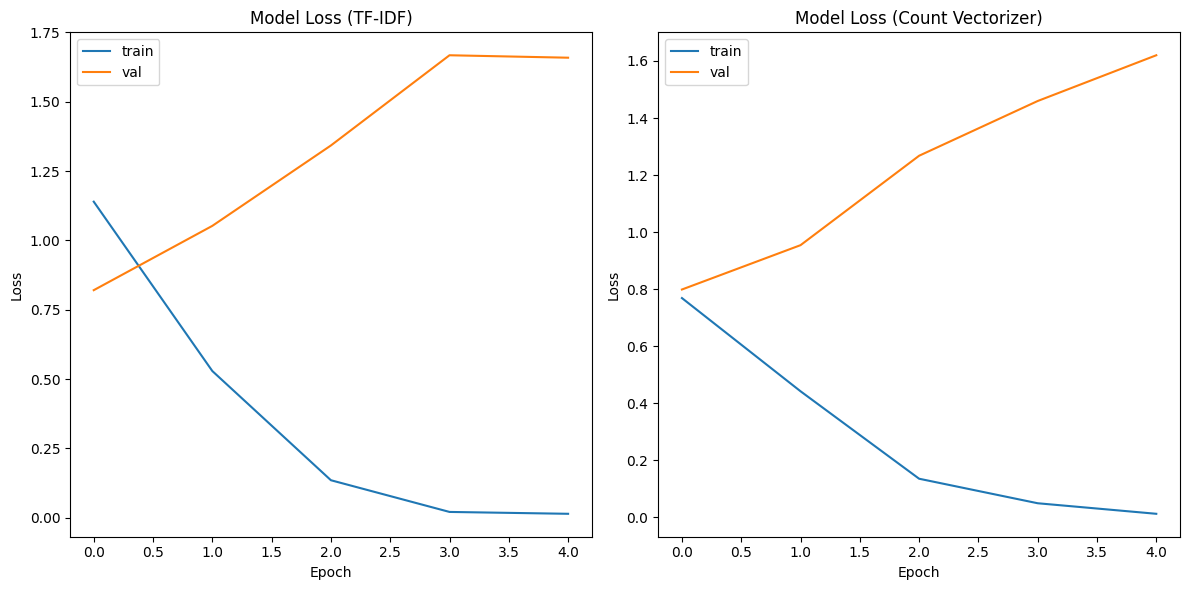

In [ ]:
# # MLP 1

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['cool','is_open','review_count', 'years_yelp', 'polarity','topic']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()


Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 56s 415ms/step - loss: 1.1121 - accuracy: 0.6376 - val_loss: 0.8669 - val_accuracy: 0.6820
Epoch 2/5
120/120 [==============================] - 44s 371ms/step - loss: 0.5651 - accuracy: 0.7918 - val_loss: 1.0137 - val_accuracy: 0.6695
Epoch 3/5
120/120 [==============================] - 41s 339ms/step - loss: 0.1367 - accuracy: 0.9592 - val_loss: 1.3804 - val_accuracy: 0.6548
Epoch 4/5
120/120 [==============================] - 40s 330ms/step - loss: 0.0226 - accuracy: 0.9958 - val_loss: 1.5589 - val_accuracy: 0.6423
Epoch 5/5
120/120 [==============================] - 39s 327ms/step - loss: 0.0236 - accuracy: 0.9956 - val_loss: 1.7390 - val_accuracy: 0.5523
Epoch 1/5
120/120 [==============================] - 57s 422ms/step - loss: 0.7738 - accuracy: 0.7048 - val_loss: 0.8086 - val_accuracy: 0.6998
Epoch 2/5
120/120 [==============================] - 42s 354ms/step - loss: 0.4156 - accuracy: 0.8481 - val_loss: 1.3696 - val_accuracy:

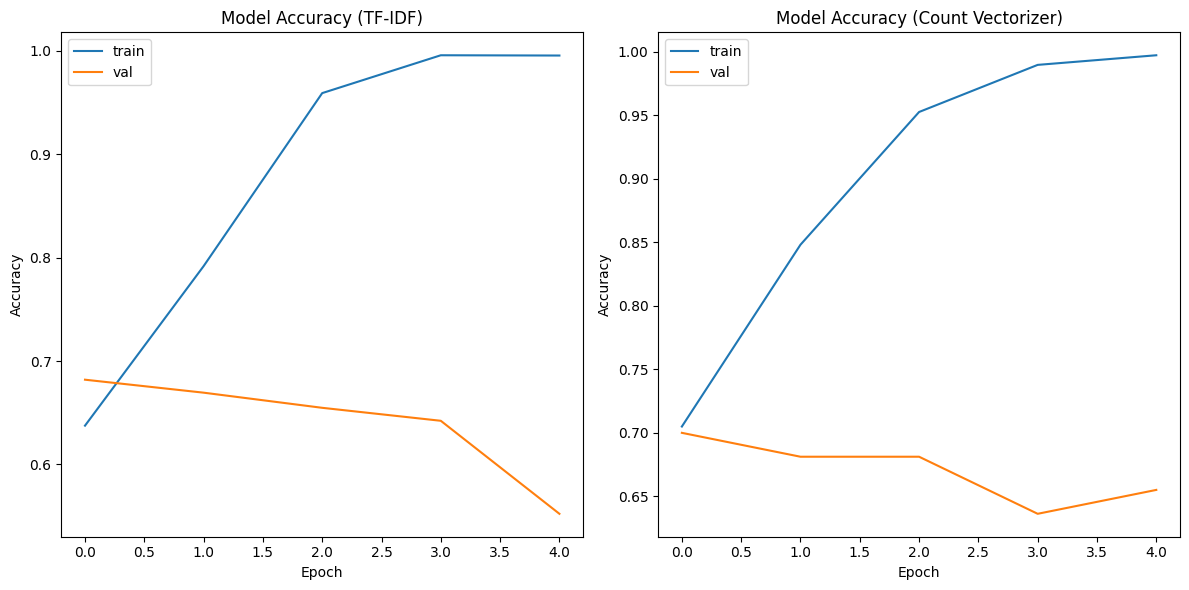

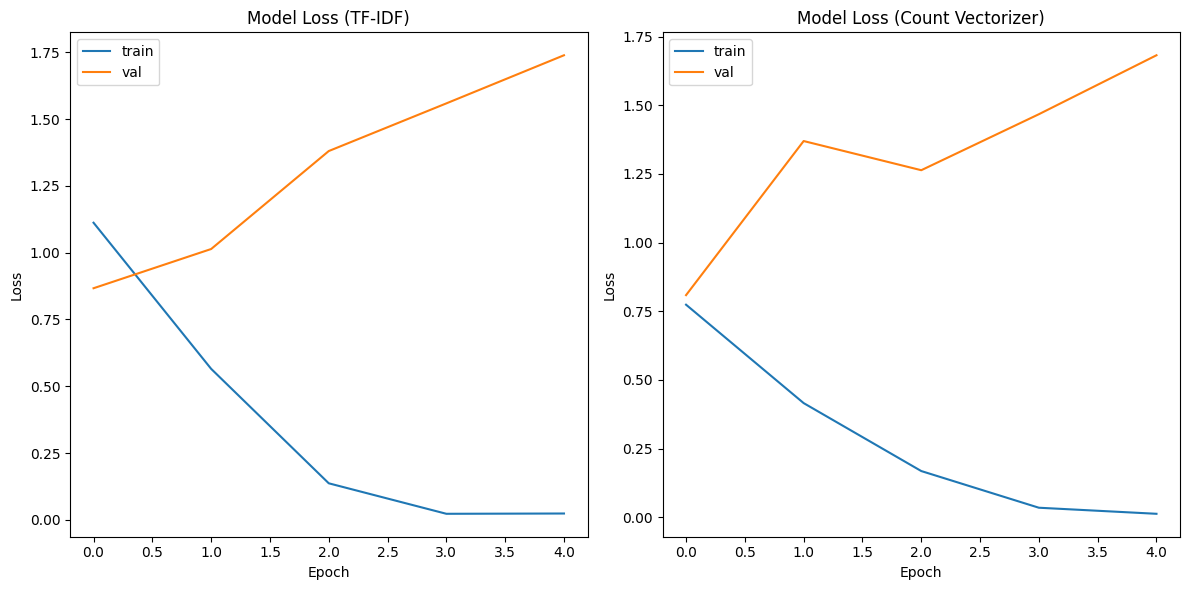

In [ ]:
# MLP 2

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['review_count', 'years_yelp', 'polarity']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

Found 13038 unique tokens.


Epoch 1/5
120/120 [==============================] - 55s 404ms/step - loss: 1.1098 - accuracy: 0.6352 - val_loss: 0.9218 - val_accuracy: 0.6831
Epoch 2/5
120/120 [==============================] - 43s 360ms/step - loss: 0.5249 - accuracy: 0.8015 - val_loss: 1.0741 - val_accuracy: 0.6611
Epoch 3/5
120/120 [==============================] - 41s 344ms/step - loss: 0.1160 - accuracy: 0.9626 - val_loss: 1.6568 - val_accuracy: 0.6172
Epoch 4/5
120/120 [==============================] - 40s 336ms/step - loss: 0.0215 - accuracy: 0.9950 - val_loss: 1.7386 - val_accuracy: 0.6255
Epoch 5/5
120/120 [==============================] - 40s 331ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 1.8603 - val_accuracy: 0.6161
Epoch 1/5
120/120 [==============================] - 55s 409ms/step - loss: 0.8451 - accuracy: 0.6899 - val_loss: 0.7844 - val_accuracy: 0.7123
Epoch 2/5
120/120 [==============================] - 44s 364ms/step - loss: 0.4726 - accuracy: 0.8237 - val_loss: 0.9230 - val_accuracy:

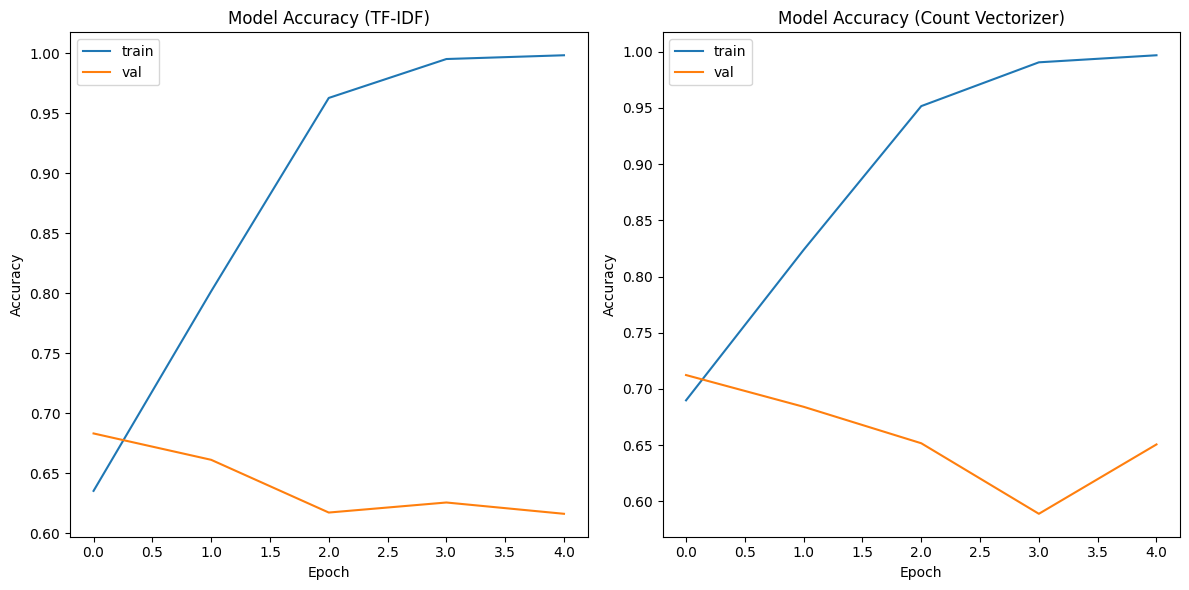

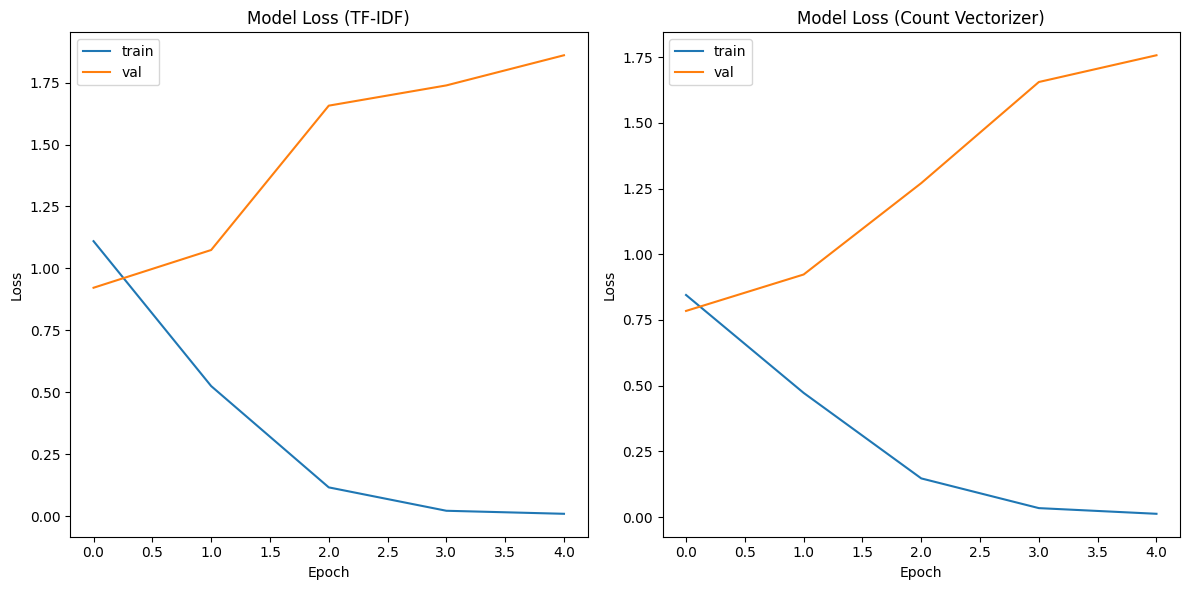

In [ ]:
# # MLP 3

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, LSTM, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# import numpy as np

# # Specify data
# texts = df.text
# labels = df.rating  
# non_text_features = df[['years_yelp']] 

# # Preprocessing
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=100)
# labels = to_categorical(np.asarray(labels))

# # Apply TF-IDF Vectorizer on your texts
# vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
# tfidf_features = vectorizer.fit_transform(texts).toarray()

# # Apply Count Vectorizer on your texts
# count_vectorizer = CountVectorizer(max_features=5000)
# count_features = count_vectorizer.fit_transform(texts).toarray()

# # Scaling the features
# scaler = StandardScaler()
# tfidf_features = scaler.fit_transform(tfidf_features)
# count_features = scaler.fit_transform(count_features)

# # Preprocessing non-text features
# scaler = StandardScaler()
# scaled_non_text_features = scaler.fit_transform(non_text_features)

# # split the data into a training set and a validation set
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# tfidf_features = tfidf_features[indices]
# count_features = count_features[indices]
# scaled_non_text_features = scaled_non_text_features[indices]

# x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)
# tfidf_features_train, tfidf_features_val = train_test_split(tfidf_features, test_size=0.2)
# count_features_train, count_features_val = train_test_split(count_features, test_size=0.2)
# non_text_features_train, non_text_features_val = train_test_split(scaled_non_text_features, test_size=0.2)

# # Text Input
# text_input = Input(shape=(data.shape[1],))
# x = Embedding(5000, 100)(text_input)
# x = SpatialDropout1D(0.2)(x)
# x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

# # TF-IDF Features Input
# tfidf_input = Input(shape=(tfidf_features.shape[1],))
# y_tfidf = Dense(100, activation='relu')(tfidf_input)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)
# y_tfidf = Dense(100, activation='relu')(y_tfidf)

# # CountVectorizer Features Input
# count_input = Input(shape=(count_features.shape[1],))
# y_count = Dense(100, activation='relu')(count_input)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)
# y_count = Dense(100, activation='relu')(y_count)

# # Non-text Features Input
# non_text_input = Input(shape=(non_text_features.shape[1],))
# z = Dense(100, activation='relu')(non_text_input)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)
# z = Dense(100, activation='relu')(z)

# # Combine inputs
# combined_tfidf = Concatenate()([x, y_tfidf, z])
# combined_count = Concatenate()([x, y_count, z])

# # Output layer
# output_tfidf = Dense(6, activation='softmax')(combined_tfidf)
# output_count = Dense(6, activation='softmax')(combined_count)

# # Building the models
# model_tfidf = Model(inputs=[text_input, tfidf_input, non_text_input], outputs=output_tfidf)
# model_count = Model(inputs=[text_input, count_input, non_text_input], outputs=output_count)

# model_tfidf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_count.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Training the models
# history_tfidf = model_tfidf.fit([x_train, tfidf_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, tfidf_features_val, non_text_features_val], y_val))
# history_count = model_count.fit([x_train, count_features_train, non_text_features_train], y_train, epochs=5, batch_size=32, validation_data=([x_val, count_features_val, non_text_features_val], y_val))

# # Evaluating the models
# score_tfidf, accuracy_tfidf = model_tfidf.evaluate([x_val, tfidf_features_val, non_text_features_val], y_val, batch_size=32)
# print("TF-IDF Test score: {:.3f}, accuracy: {:.3f}".format(score_tfidf, accuracy_tfidf))

# score_count, accuracy_count = model_count.evaluate([x_val, count_features_val, non_text_features_val], y_val, batch_size=32)
# print("Count Vectorizer Test score: {:.3f}, accuracy: {:.3f}".format(score_count, accuracy_count))

# # Summary report
# model_tfidf.summary()
# model_count.summary()

# # Plotting the training and validation accuracy
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['accuracy'])
# plt.plot(history_tfidf.history['val_accuracy'])
# plt.title('Model Accuracy (TF-IDF)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['accuracy'])
# plt.plot(history_count.history['val_accuracy'])
# plt.title('Model Accuracy (Count Vectorizer)')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Plotting the training and validation loss
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history_tfidf.history['loss'])
# plt.plot(history_tfidf.history['val_loss'])
# plt.title('Model Loss (TF-IDF)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history_count.history['loss'])
# plt.plot(history_count.history['val_loss'])
# plt.title('Model Loss (Count Vectorizer)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')

# plt.tight_layout()
# plt.show()

## Modelling Plots

### 1.Machine Learning Models

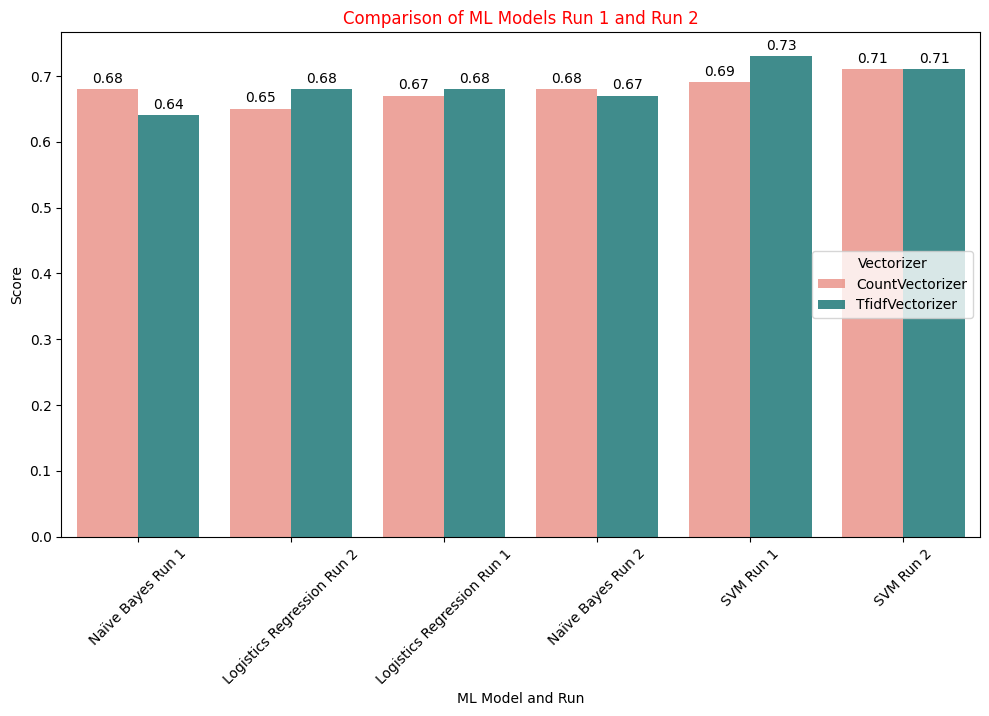

In [ ]:
# ML Model Comparison Plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the DataFrame with the given data
data = {
    'ML Model': ['Logistics Regression', 'Logistics Regression', 'Naïve Bayes', 'Naïve Bayes', 'SVM', 'SVM'],
    'Vectorizer': ['CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer'],
    'Run 1': [0.67, 0.68, 0.68, 0.64, 0.69, 0.73],
    'Run 2': [0.65, 0.68, 0.68, 0.67, 0.71, 0.71]
}

df = pd.DataFrame(data)

# Melt the DataFrame to separate Run 1 and Run 2 by ML Model
df_melted = pd.melt(df, id_vars=['ML Model', 'Vectorizer'], value_vars=['Run 1', 'Run 2'], var_name='Run', value_name='Score')

# Combine ML Model and Run columns for each vectorizer
df_melted['Model_Run'] = df_melted['ML Model'] + ' ' + df_melted['Run']

# Sort the DataFrame by Score in ascending order
df_melted = df_melted.sort_values(by='Score')

# Plot the comparison with modified bar colors and sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x='Model_Run', y='Score', hue='Vectorizer', data=df_melted, alpha=0.8, palette=['salmon', 'teal'], hue_order=['CountVectorizer', 'TfidfVectorizer'])

# Add values above each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', color='black')

plt.xlabel('ML Model and Run')
plt.ylabel('Score')
plt.title('Comparison of ML Models Run 1 and Run 2', color='red')
plt.legend(title='Vectorizer', loc='center right')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### 2.Ensemble Learning Models

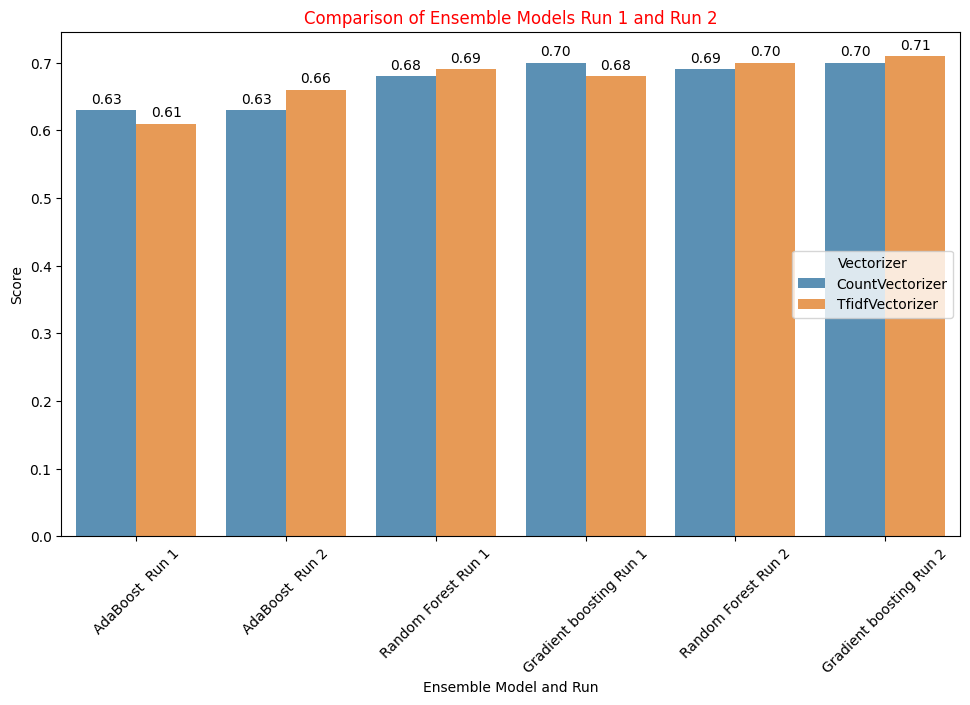

In [ ]:
# Ensemble Model Comparison

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the DataFrame with the given data
data = {
    'Ensemble Model': ['Random Forest', 'Random Forest', 'AdaBoost ', 'AdaBoost ', 'Gradient boosting', 'Gradient boosting'],
    'Vectorizer': ['CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer'],
    'Run 1': [0.68, 0.69, 0.63, 0.61, 0.70, 0.68],
    'Run 2': [0.69, 0.70, 0.63, 0.66, 0.70, 0.71]
}

df = pd.DataFrame(data)

# Melt the DataFrame to separate Run 1 and Run 2 by ML Model
df_melted = pd.melt(df, id_vars=['Ensemble Model', 'Vectorizer'], value_vars=['Run 1', 'Run 2'], var_name='Run', value_name='Score')

# Combine ML Model and Run columns for each vectorizer
df_melted['Model_Run'] = df_melted['Ensemble Model'] + ' ' + df_melted['Run']

# Sort the DataFrame by Score in ascending order
df_melted = df_melted.sort_values(by='Score')

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model_Run', y='Score', hue='Vectorizer', data=df_melted, alpha=0.8, hue_order=['CountVectorizer', 'TfidfVectorizer'])

# Add values above each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', color='black')

plt.xlabel('Ensemble Model and Run')
plt.ylabel('Score')
plt.title('Comparison of Ensemble Models Run 1 and Run 2', color='red')
plt.legend(title='Vectorizer', loc='center right')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### 3.Deep Learning Models

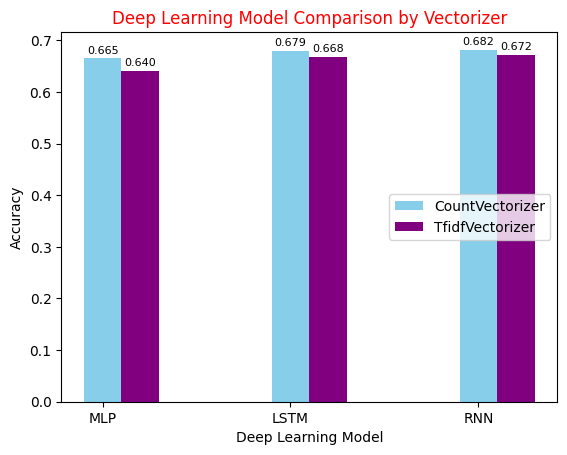

In [ ]:
# Deep Learning Model Comparison

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['MLP', 'MLP', 'RNN', 'RNN', 'LSTM', 'LSTM']
vectorizers = ['CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer'] 
accuracy = [0.665, 0.640, 0.679, 0.668, 0.682, 0.672]  

# Get unique models and vectorizers
unique_models = list(set(models))
unique_vectorizers = ['CountVectorizer', 'TfidfVectorizer']  # Specified manually to preserve order

# Create a figure and axis
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.2

# Set the x-axis positions
x_positions = np.arange(len(unique_models))

# Define custom colors
colors = ['skyblue', 'purple']

# Plot separate columns for each vectorizer by model
for i, vectorizer in enumerate(unique_vectorizers):
    accuracies = [accuracy[j] for j in range(len(models)) if vectorizers[j] == vectorizer]
    ax.bar(x_positions + (i * bar_width), accuracies, width=bar_width, label=vectorizer, color=colors[i])
    
    # Add accuracy values above the bars with decreased font size
    for j, acc in enumerate(accuracies):
        ax.text(x_positions[j] + (i * bar_width), acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=8)

# Set the x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(unique_models)

ax.set_xlabel('Deep Learning Model')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the plot title
ax.set_title('Deep Learning Model Comparison by Vectorizer', color='red')

# Move the legend to the middle right
ax.legend(loc='center right')

# Display the plot
plt.show()

## Modelling Conclusions & Recommendations

The Modelling process has revealed that there is not much difference between the traditional Machine Learning Models, Ensemble Models and Deep Models for the purpose of Sentiment Analysis using NLP. Results marginally improved for Machine and Ensemble Learning when RandonSearch CV was applied.

Notwithstanding the closeness of the results, it is recommended that SVM in conjunction with the TF-IDF Vectorizer will provide the highest level of accuracy. Gradient Boosting was not far behind however it does require more memory and processing power than SVM.

Another takeaway is that more data is required given that there were insufficient samples for a ROC curve for class 0.





## References
- Elizabeth, E 2020, 11 Best Restaurant Review Sites for 2022 - Restaurant Clicks, restaurantclicks.com, viewed 9 May 2023, <https://restaurantclicks.com/restaurant-review-sites/>.
- Ibisworld 2023, IBISWorld - Industry Market Research, Reports, and Statistics, www.ibisworld.com, viewed 6 May 2023, <https://www.ibisworld.com/united-states/market-research-reports/pizza-restaurant-franchises-industry/>.
- Lake, A 2022, 4 Major Fast-Food Chains With Declining Sales This Year — Eat This Not That, eatthis.com, viewed 21 November 2022, <https://www.eatthis.com/news-major-restaurant-chains-declining-sales-2022/>.
- Tan, KL, Lee, CP & Lim, KM 2023, ‘A Survey of Sentiment Analysis: Approaches, Datasets, and Future Research’, Applied Sciences, vol. 13, no. 7, p. 4550.
- yelp 2019, Yelp Dataset, Yelp.com, viewed 6 May 2023, <https://www.yelp.com/dataset>.
- Yum! 2023, Financial Reports - Yum! Brands, investors.yum.com, viewed 12 May 2023, <https://investors.yum.com/financial-information/financial-reports/>.
